<a href="https://colab.research.google.com/github/amruthavarshinisoma/dataanalysis/blob/main/fakenewsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
LR.fit(t,m)
LR.predict([[5.5]])

array([78.64935065])

In [ ]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset


In [ ]:
data_true=pd.read_csv("/content/drive/MyDrive/train.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
data_true.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data_fake.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data_true.shape, data_fake.shape

((103904, 25), (25976, 25))

In [ ]:
data_true["class"]=1
data_fake["class"]=0

In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(25965,25955,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

data_fake_manual_testing = data_fake.tail(10)
for i in range(25965,25955,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,0
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,0
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,3,1,4,0,6.0,satisfied,0
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,0
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,4,3,1,1,2,5,0,0.0,satisfied,0
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,4,5,3,0,0.0,satisfied,0
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,5,4,3,77,65.0,satisfied,0
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,2,2,5,3,3,5,1,0.0,satisfied,0
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,5,4,4,28,14.0,satisfied,0


Gender
Female    65886
Male      63974
Name: class, dtype: int64


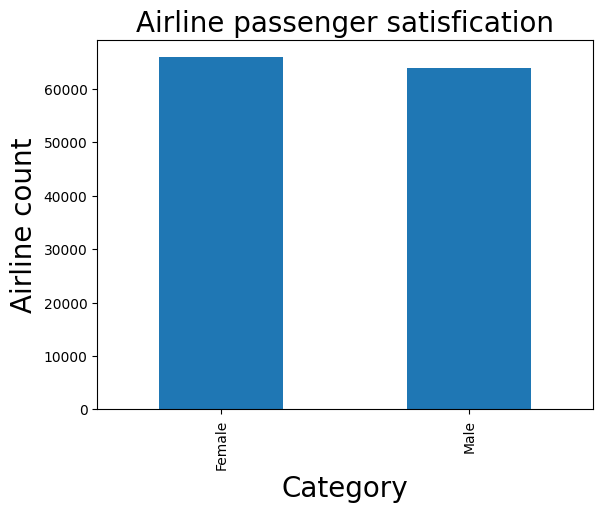

In [ ]:
print(data_merge.groupby(['Gender'])['class'].count())
data_merge.groupby(['Gender'])['class'].count().plot(kind="bar")
plt.title("Airline passenger satisfication",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Airline count",size=20)
plt.show()

class
0     25966
1    103894
Name: class, dtype: int64
0 = Fake news
1 = True news


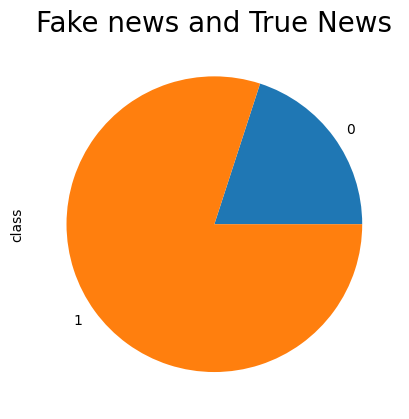

In [ ]:
print(data_merge.groupby(['class'])['class'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['class'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [ ]:
data = data_merge.drop(["Customer Type","Gender","id"], axis=1)
data.head(10) #displaying remaining dataset

,Unnamed: 0,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
0,0,52,Business travel,Eco,160,5,4,3,4,3,...,5,5,5,2,5,5,50,44.0,satisfied,0
1,1,36,Business travel,Business,2863,1,1,3,1,5,...,4,4,4,3,4,5,0,0.0,satisfied,0
2,2,20,Business travel,Eco,192,2,0,2,4,2,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0
3,3,44,Business travel,Business,3377,0,0,0,2,3,...,1,1,1,3,1,4,0,6.0,satisfied,0
4,4,49,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,4,2,4,0,20.0,satisfied,0
5,5,16,Business travel,Eco,311,3,3,3,3,5,...,4,3,1,1,2,5,0,0.0,satisfied,0
6,6,77,Business travel,Business,3987,5,5,5,5,3,...,5,5,5,4,5,3,0,0.0,satisfied,0
7,7,43,Business travel,Business,2556,2,2,2,2,4,...,4,4,4,5,4,3,77,65.0,satisfied,0
8,8,47,Business travel,Eco,556,5,2,2,2,5,...,2,2,5,3,3,5,1,0.0,satisfied,0
9,9,46,Business travel,Business,1744,2,2,2,2,3,...,4,4,4,5,4,4,28,14.0,satisfied,0


In [ ]:
data=data.sample(frac=1)
data.head(10)

,Unnamed: 0,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
73073,73073,30,Business travel,Business,3982,1,1,1,1,5,...,1,1,2,2,3,5,0,0.0,satisfied,1
4387,4387,36,Business travel,Eco,1258,3,3,3,2,5,...,1,5,3,4,3,5,0,11.0,neutral or dissatisfied,1
19189,19189,51,Business travel,Business,2077,4,1,4,4,2,...,5,5,5,5,5,4,0,1.0,satisfied,0
13511,13511,23,Personal Travel,Eco,624,3,5,3,4,4,...,3,4,5,3,5,4,0,22.0,neutral or dissatisfied,1
25643,25643,21,Business travel,Eco,1013,4,4,4,4,1,...,1,4,5,2,4,1,12,64.0,satisfied,1
380,380,51,Business travel,Business,1488,2,3,3,3,4,...,2,2,2,4,2,2,73,62.0,neutral or dissatisfied,1
11170,11170,31,Personal Travel,Eco Plus,2075,2,3,3,3,3,...,1,3,3,2,4,3,0,0.0,neutral or dissatisfied,1
87655,87655,46,Business travel,Business,1066,3,5,5,5,4,...,3,3,3,4,3,3,15,5.0,neutral or dissatisfied,1
66028,66028,34,Personal Travel,Eco,689,4,4,4,5,3,...,4,2,4,3,5,3,0,0.0,neutral or dissatisfied,1
9265,9265,38,Personal Travel,Business,446,4,5,4,2,2,...,3,4,3,5,3,5,36,48.0,neutral or dissatisfied,0


In [ ]:
data.isnull().sum()

Unnamed: 0                             0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
class                                  0
dtype: int64